In [65]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np


In [81]:
def abstract(i):  
    
    # construct the argument parser and parse the arguments
    # ap = argparse.ArgumentParser()
    # ap.add_argument("-i", "--image", required = True, help = "Path to the image")
    # args = vars(ap.parse_args())

    # load the image and convert it to a floating point data type
    #image = cv2.imread('flower.jpg')
    image=i
    image_norm=img_as_float(image)
    #image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
    # loop over the number of segments
    segments = slic(image, n_segments = 500, compactness=12, sigma = 1,multichannel=True, convert2lab=True)

    # show the output of SLIC

    plt.imshow(mark_boundaries(image_rgb, segments))
    plt.savefig('segment.jpg')
    plt.show()
    segments
    n_segments = segments.max() + 1

    # construct position matrix
    max_y, max_x = np.array(segments.shape) - 1
    x = np.linspace(0, max_x, image.shape[1]) / max_x
    y = np.linspace(0, max_y, image.shape[0]) / max_y
    position = np.dstack((np.meshgrid(x, y)))

    # mean_lab = np.zeros((n_segments, 3))
    # mean_rgb = np.zeros((n_segments, 3))
    # mean_position = np.zeros((n_segments, 2))
    # for superpixel in np.unique(superpixels):
    #     mask = superpixels == superpixel
    #     mean_lab[superpixel, :] = nlab[mask, :].mean(axis=0)
    #     mean_rgb[superpixel, :] = nrgb[mask, :].mean(axis=0)
    #     mean_position[superpixel, :] = position[mask, :].mean(axis=0)
    mean_colors = np.zeros((n_segments, 3))
    mean_position = np.zeros((n_segments, 2))
    for i in np.unique(segments):
        mask = segments == i
        mean_colors[i,:]=image_norm[mask,:].mean(axis=0)
        mean_position[i, :] = position[mask, :].mean(axis=0)

    mean_position
    mean_colors
    d_abstract={}
#     for j in range (mean_position.shape[0]):
#         d_abstract[j]=[]

#     for k in range (mean_position.shape[0]):

#         d_abstract[k].append([[mean_position[i]],[mean_colors[i]]])
    
    return mean_colors,mean_position


mean_position[0]


array([0.05086028, 0.01145794])

In [24]:
# d={}
# d_abst={}
# d_uniqueness={}
# r,c=segments.shape
# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]]=[]
#         d_uniqueness[segments[i,j]]=[]
#         d_abst[segments[i,j]]=[]
        

# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]].append(image_norm[i,j])
        


In [25]:
# import numpy as np
# image_copy=np.copy(image_norm)
# for i in range (r):
#     for j in range (c):
#         image_copy[i,j]= np.median(d[segments[i,j]],axis=0)
#         d_uniqueness[segments[i,j]].append([[i,j] ,[image_copy[i,j]]])
# cv2.imwrite('image_copy.jpg',(image_copy * 255).astype('uint8'))


True

C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[s

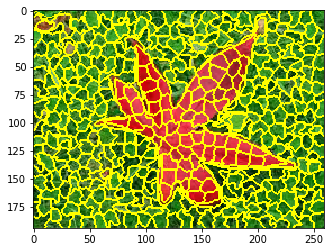

array([-0.04439497,  0.07225258, -0.0043604 ])

In [89]:
from skimage import io
image=io.imread('flower.jpg')
c,p = abstract(image)
